# k-fold Cross-Validation
k-fold cross-validation that will split a given data sample up is provided by scikit-learn library.
Below is a basic example of using KFold from sklearn.

In [0]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold

In [0]:
# data sample
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

For example, we can create an instance that splits a dataset into 3 folds, shuffles prior to the split, and uses a value of 1 for the pseudorandom number generator.

In [0]:
# prepare cross validation
kfold = KFold(3, True, 1)

In [6]:
# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

train: [0.1 0.4 0.5 0.6], test: [0.2 0.3]
train: [0.2 0.3 0.4 0.6], test: [0.1 0.5]
train: [0.1 0.2 0.3 0.5], test: [0.4 0.6]


# Example of Cross-validation on diabetes Dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [0]:
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

In [12]:
X
X.shape

(150, 10)

In [13]:
y.shape

(150,)

In [16]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [-0.05637009, -0.04464164,  0.09295276, ...,  0.02545259,
         0.02605609,  0.04034337],
       [-0.06000263,  0.05068012,  0.01535029, ..., -0.00259226,
        -0.03075121, -0.0010777 ],
       [-0.04910502,  0.05068012, -0.00512814, ...,  0.07120998,
         0.06123791, -0.03835666]])

In [0]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

In [0]:
tuned_parameters = [{'alpha': alphas}]
n_folds = 10

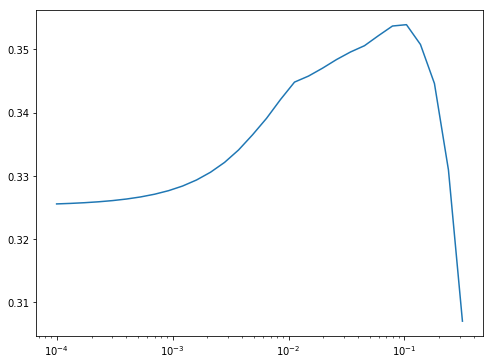

In [19]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

In [0]:
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

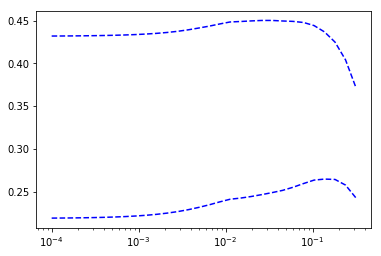

In [21]:
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

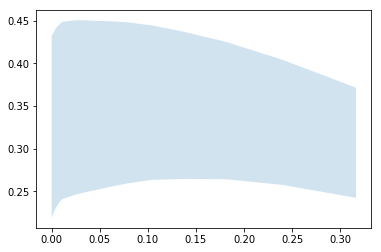

In [22]:
# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

(0.0001, 0.31622776601683794)

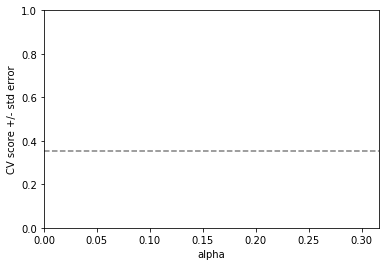

In [23]:
plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])

In [24]:
# Bonus: how much can you trust the selection of alpha?
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=0, max_iter=10000)
k_fold = KFold(3)

print("Answer to the bonus question:",
      "how much can you trust the selection of alpha?")
print()
print("Alpha parameters maximising the generalization score on different")
print("subsets of the data:")
for k, (train, test) in enumerate(k_fold.split(X, y)):
    lasso_cv.fit(X[train], y[train])
    print("[fold {0}] alpha: {1:.5f}, score: {2:.5f}".
          format(k, lasso_cv.alpha_, lasso_cv.score(X[test], y[test])))
print()
print("Answer: Not very much since we obtained different alphas for different")
print("subsets of the data and moreover, the scores for these alphas differ")
print("quite substantially.")

plt.show()

Answer to the bonus question: how much can you trust the selection of alpha?

Alpha parameters maximising the generalization score on different
subsets of the data:
[fold 0] alpha: 0.05968, score: 0.54209
[fold 1] alpha: 0.04520, score: 0.15523
[fold 2] alpha: 0.07880, score: 0.45193

Answer: Not very much since we obtained different alphas for different
subsets of the data and moreover, the scores for these alphas differ
quite substantially.
